<a href="https://colab.research.google.com/github/Manikanta-Munnangi/CROP---Plant-Disease-Identification-Using-App/blob/master/Crop-Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# `1.Import Libraries.`

In [0]:
# Import Libraries
import warnings
warnings.filterwarnings("ignore")

import os
import glob
import matplotlib.pyplot as plt
# Keras API
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D,Activation,AveragePooling2D,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


# `2.Load Data into Train and Test Variables.`

In [0]:
# My data is in google drive.
train_dir ="drive/My Drive/train_set/"
test_dir="drive/My Drive/test_data/"

# `3.Function to count images in each data set.`

In [0]:
# function to get count of images
def get_files(directory):
  if not os.path.exists(directory):
    return 0
  count=0
  for current_path,dirs,files in os.walk(directory):
    for dr in dirs:
      count+= len(glob.glob(os.path.join(current_path,dr+"/*")))
  return count    

In [0]:
train_samples =get_files(train_dir)
num_classes=len(glob.glob(train_dir+"/*"))
test_samples=get_files(test_dir)
print(num_classes,"Classes")
print(train_samples,"Train images")
print(test_samples,"Test images")

12 Classes
14955 Train images
432 Test images


In [0]:
# Preprocessing data.
train_datagen=ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   validation_split=0.2,
                                   horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [0]:
# set height and width and color of input image.
img_width,img_height =256,256
input_shape=(img_width,img_height,3)
batch_size =32

train_generator =train_datagen.flow_from_directory(train_dir,
                                                   target_size=(img_width,img_height),
                                                   batch_size=batch_size)
test_generator=test_datagen.flow_from_directory(test_dir,shuffle=True,
                                                   target_size=(img_width,img_height),
                                                   batch_size=batch_size)

Found 14955 images belonging to 12 classes.
Found 432 images belonging to 12 classes.


In [0]:

# The name of the 12 diseases.
train_generator.class_indices

{'Potato___Early_blight': 0,
 'Potato___Late_blight': 1,
 'Potato___healthy': 2,
 'Tomato___Bacterial_spot': 3,
 'Tomato___Early_blight': 4,
 'Tomato___Late_blight': 5,
 'Tomato___Leaf_Mold': 6,
 'Tomato___Septoria_leaf_spot': 7,
 'Tomato___Spider_mites Two-spotted_spider_mite': 8,
 'Tomato___Target_Spot': 9,
 'Tomato___Tomato_mosaic_virus': 10,
 'Tomato___healthy': 11}

In [0]:
# CNN building.
model = Sequential()
model.add(Conv2D(32, (5, 5),input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(32, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))   
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128,activation='relu'))          
model.add(Dense(num_classes,activation='softmax'))
model.summary()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 252, 252, 32)      2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 84, 84, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 82, 82, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 41, 41, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 39, 39, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 19, 19, 64)        0         


In [0]:
model_layers = [ layer.name for layer in model.layers]
print('layer name : ',model_layers)

layer name :  ['conv2d_1', 'max_pooling2d_1', 'conv2d_2', 'max_pooling2d_2', 'conv2d_3', 'max_pooling2d_3', 'flatten_1', 'dense_1', 'dropout_1', 'dense_2', 'dense_3']


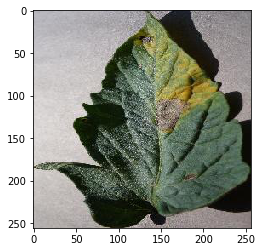

In [0]:
from keras.preprocessing import image
import numpy as np
img1 = image.load_img('/content/drive/My Drive/Train_d/Tomato___Early_blight/Tomato___Early_blight (10).JPG')
plt.imshow(img1);
#preprocess image
img1 = image.load_img('/content/drive/My Drive/Train_d/Tomato___Early_blight/Tomato___Early_blight (10).JPG', target_size=(256, 256))
img = image.img_to_array(img1)
img = img/255
img = np.expand_dims(img, axis=0)

from keras.models import Model
conv2d_1_output = Model(inputs=model.input, outputs=model.get_layer('conv2d_1').output)
max_pooling2d_1_output = Model(inputs=model.input,outputs=model.get_layer('max_pooling2d_1').output)
conv2d_2_output = Model(inputs=model.input,outputs=model.get_layer('conv2d_2').output)
max_pooling2d_2_output = Model(inputs=model.input,outputs=model.get_layer('max_pooling2d_2').output)
conv2d_3_output = Model(inputs=model.input,outputs=model.get_layer('conv2d_3').output)
max_pooling2d_3_output = Model(inputs=model.input,outputs=model.get_layer('max_pooling2d_3').output)
flatten_1_output = Model(inputs=model.input,outputs=model.get_layer('flatten_1').output)
conv2d_1_features = conv2d_1_output.predict(img)
max_pooling2d_1_features = max_pooling2d_1_output.predict(img)
conv2d_2_features = conv2d_2_output.predict(img)
max_pooling2d_2_features = max_pooling2d_2_output.predict(img)
conv2d_3_features = conv2d_3_output.predict(img)
max_pooling2d_3_features = max_pooling2d_3_output.predict(img)
flatten_1_features = flatten_1_output.predict(img)

# `Visualizing the image after every Layer.`

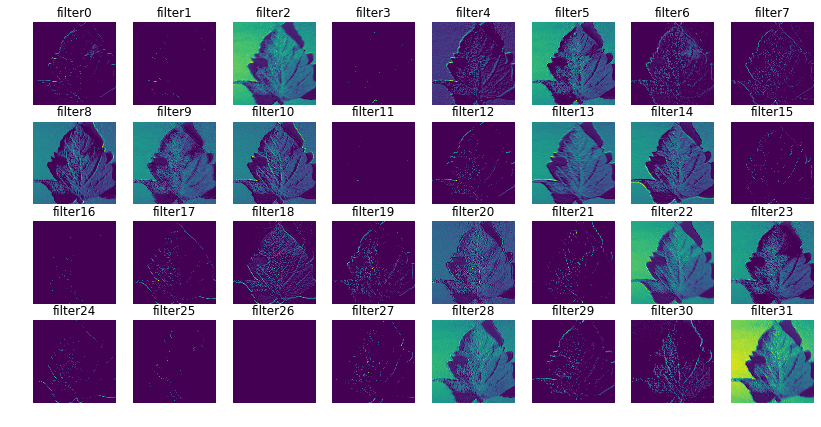

In [0]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_1_features[0, :, :, i], cmap='viridis') # Visualizing in color mode.
plt.show()

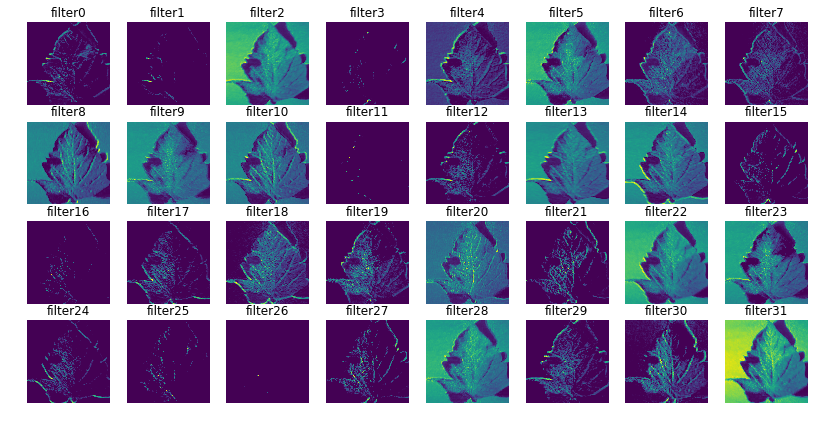

In [0]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(max_pooling2d_1_features[0, :, :, i], cmap='viridis')
plt.show()

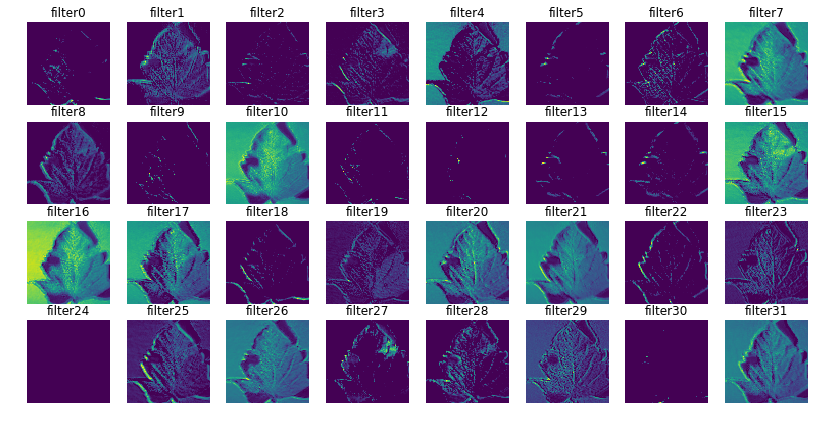

In [0]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_2_features[0, :, :, i], cmap='viridis')
plt.show()

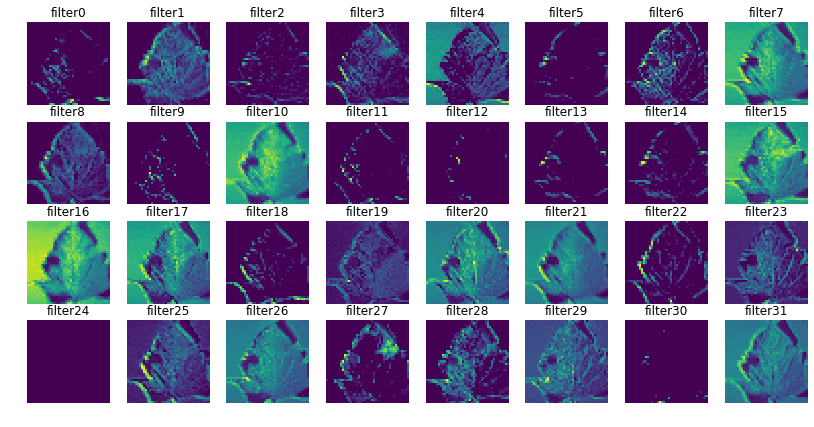

In [0]:
# we can also visualize in color mode.
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(max_pooling2d_2_features[0, :, :, i], cmap='viridis') 
plt.show()

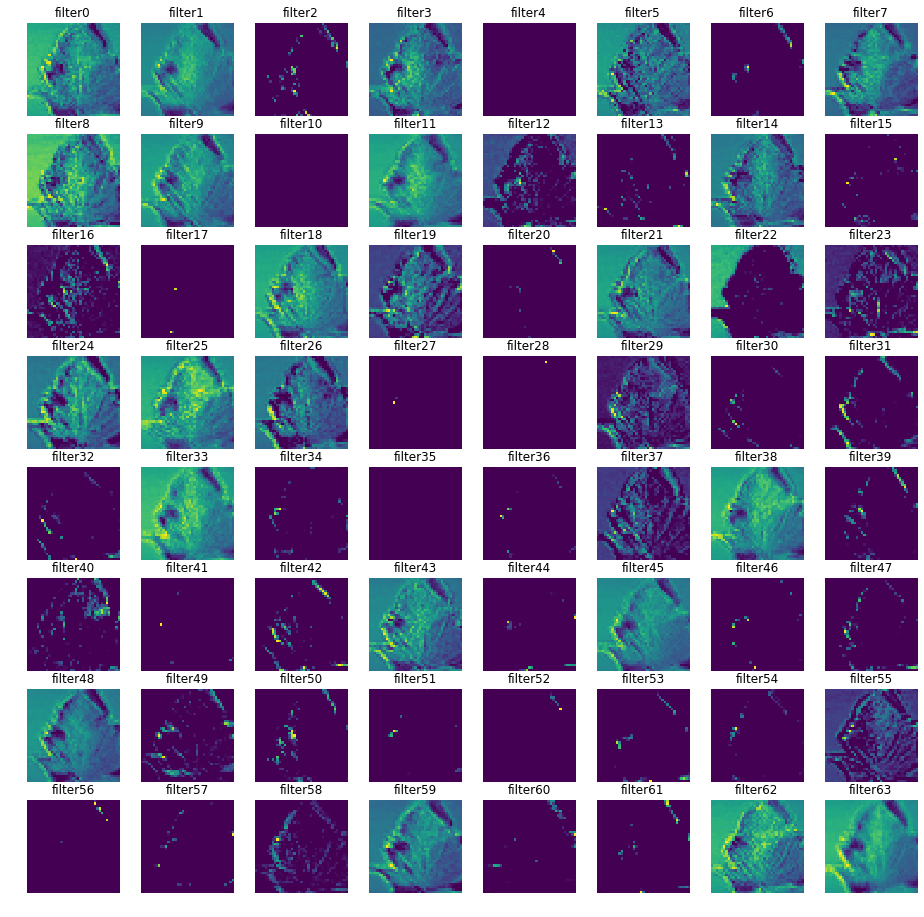

In [0]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(16,16))
columns =8 
rows = 8
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_3_features[0, :, :, i], cmap='viridis')
plt.show()

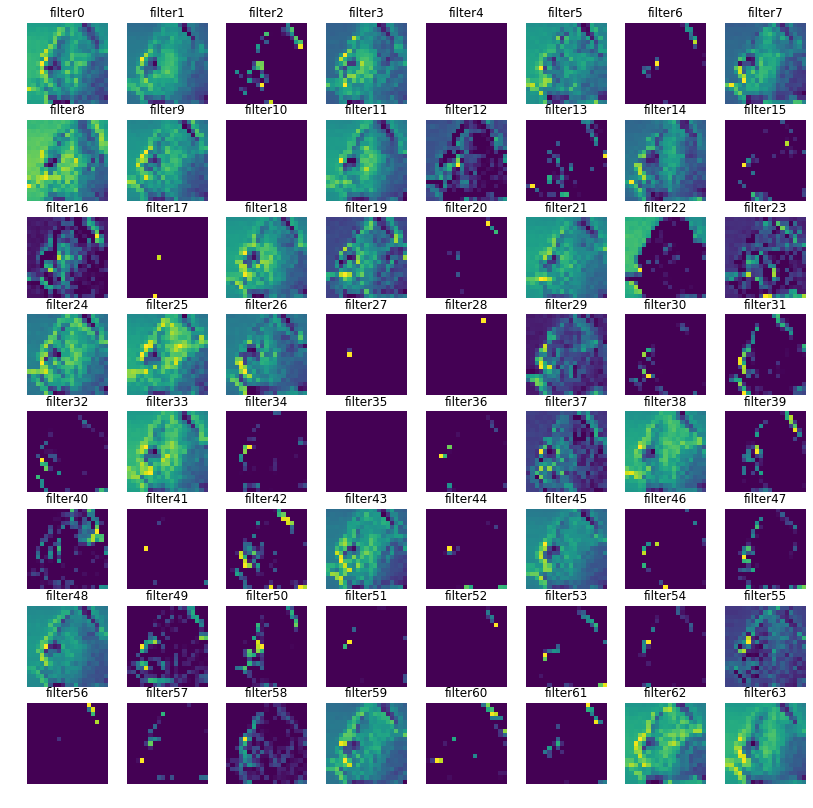

In [0]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,14))
columns = 8
rows = 8
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(max_pooling2d_3_features[0, :, :, i],cmap='viridis')
plt.show()

# Training the Model

In [0]:
validation_generator = train_datagen.flow_from_directory(
    train_dir, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size) 

Found 14955 images belonging to 12 classes.


In [19]:
opt=keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
train=model.fit_generator(train_generator,
                          nb_epoch=15,
                          steps_per_epoch=train_generator.samples // batch_size,
                          validation_data=validation_generator,
                          nb_val_samples= validation_generator.samples// batch_size,verbose=1)




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/15
467/467 [==============================] - 5280s 11s/step - loss: 1.5100 - acc: 0.4779 - val_loss: 0.8490 - val_acc: 0.7109
Epoch 2/15
467/467 [==============================] - 502s 1s/step - loss: 0.8229 - acc: 0.7146 - val_loss: 0.6118 - val_acc: 0.8011
Epoch 3/15
467/467 [==============================] - 499s 1s/step - loss: 0.5629 - acc: 0.8058 - val_loss: 0.5076 - val_acc: 0.8262
Epoch 4/15
467/467 [==============================] - 494s 1s/step - loss: 0.4463 - acc: 0.8501 - val_loss: 0.2907 - val_acc: 0.9020
Epoch 5/15
467/467 [==============================] - 495s 1s/step - loss: 0.3695 - acc: 0.8744 - val_loss: 0.2276 - val_acc: 0.9229
Epoch 6/15
467/467 [==============================] - 492s 1s/step - loss: 0.3277 - acc: 0.8879 - val_loss: 0.2158 - val_acc: 0.9282
Epoch 7/15
467/467 [==============================] - 493s 1s/step - loss: 0.2867 - acc: 0.9020 - val_

# Plot for Accuracy and Losses

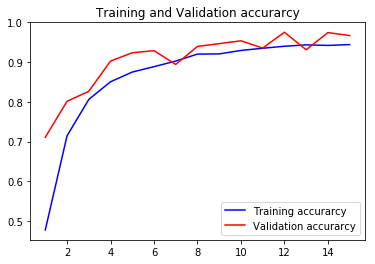

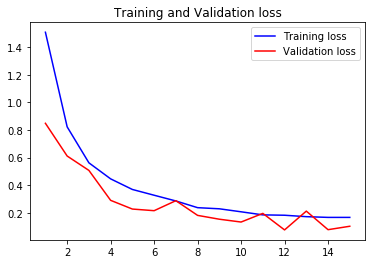

In [20]:
acc = train.history['acc']
val_acc = train.history['val_acc']
loss = train.history['loss']
val_loss = train.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

# Saving Model trained weights 

In [0]:
# Save model
from keras.models import load_model
model.save('crop.h5')

In [22]:
# Get classes of model trained on
classes = train_generator.class_indices 
classes


{'Potato___Early_blight': 0,
 'Potato___Late_blight': 1,
 'Potato___healthy': 2,
 'Tomato___Bacterial_spot': 3,
 'Tomato___Early_blight': 4,
 'Tomato___Late_blight': 5,
 'Tomato___Leaf_Mold': 6,
 'Tomato___Septoria_leaf_spot': 7,
 'Tomato___Spider_mites Two-spotted_spider_mite': 8,
 'Tomato___Target_Spot': 9,
 'Tomato___Tomato_mosaic_virus': 10,
 'Tomato___healthy': 11}

# Load Model from Pickle

In [0]:
# Loading model and predict.
from keras.models import load_model
model=load_model('crop.h5')

Classes = ["Potato___Early_blight","Potato___Late_blight","Potato___healthy","Tomato___Bacterial_spot","Tomato___Early_blight","Tomato___Late_blight","Tomato___Leaf_Mold","Tomato___Septoria_leaf_spot","Tomato___Spider_mites Two-spotted_spider_mite","Tomato___Target_Spot","Tomato___Tomato_mosaic_virus","Tomato___healthy"]


# Time for Predictions.

Tomato___Bacterial_spot


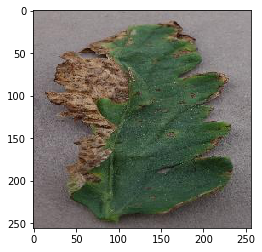

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Pre-Processing test data same as train data.
img_width=256
img_height=256
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

from keras.preprocessing import image

def prepare(img_path):
    img = image.load_img(img_path, target_size=(256, 256))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)
    
    
result = model.predict_classes([prepare('/content/drive/My Drive/Test_d/Tomato_BacterialSpot/Tomato___Bacterial_spot (901).JPG')])
disease=image.load_img('/content/drive/My Drive/Test_d/Tomato_BacterialSpot/Tomato___Bacterial_spot (901).JPG')
plt.imshow(disease)
print (Classes[int(result)])

## `Convert model to tflite`.
- This conversion is done because to make our model interpertable with App.
- tflite is tensorflowlite made for mobile versions.

In [26]:
import tensorflow as tf
converter = tf.lite.TFLiteConverter.from_keras_model_file('crop.h5') 
tfmodel = converter.convert() 
open ("output.tflite" , "wb") .write(tfmodel)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use `tf.compat.v1.graph_util.convert_variables_to_constants`
Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`
INFO:tensorflow:Froze 12 variables.
INFO:tensorflow:Converted 12 variables to const ops.


47711564